In [38]:
import cv2
import math
import matplotlib.pyplot as plt

In [39]:
# Lists to store the points
center=[]
circumference=[]

In [40]:
# Define the callback fucntion

def drawCircle(action, x, y, flags, userdata):
    
  # Referencing global variables 
  global center, circumference
    
  # Action when left mouse button is pressed
  if action==cv2.EVENT_LBUTTONDOWN:
    center=[(x,y)]
    
    # Mark the center
    cv2.circle(source, center[0], 1, (255,255,0), 2, cv2.LINE_AA );

  # Action when left mouse button is released
  elif action==cv2.EVENT_LBUTTONUP:
    circumference=[(x,y)]
    
    # Calculate radius of the circle
    radius = math.sqrt(math.pow(center[0][0]-circumference[0][0],2)+
                        math.pow(center[0][1]-circumference[0][1],2))
    # Draw the circle
    cv2.circle(source, center[0], int(radius), (0,255,0),2, 
                    cv2.LINE_AA)
    cv2.imshow("Window",source)

In [41]:
# Load the picture
source = cv2.imread("/home/jean/Pictures/IMG-20190901-WA0025.jpg",1)

# Make a dummy image, will be useful to clear the drawing
dummy = source.copy()
cv2.namedWindow("Window")

# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawCircle)
k = 0

# loop until escape character is pressed
while k!=27 :

    cv2.imshow("Window", source)
    cv2.putText(source,'''Choose center, and drag, 
                      Press ESC to exit and c to clear''' ,
              (10,30), cv2.FONT_HERSHEY_SIMPLEX, 
              0.7,(255,255,255), 2 );
    k = cv2.waitKey(20) & 0xFF
    
    # Another way of cloning
    if k==99:
        source= dummy.copy()


cv2.destroyAllWindows()

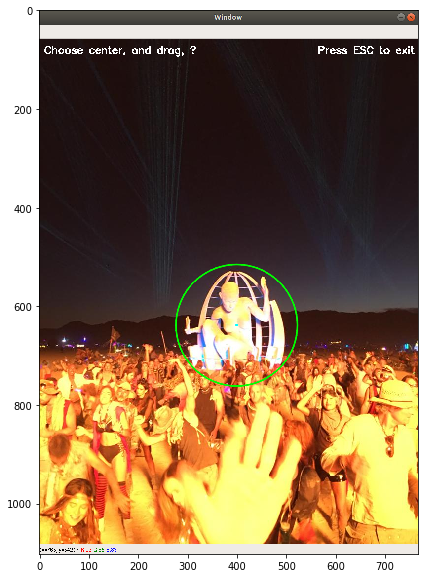

In [42]:
plt.rcParams['figure.figsize'] = [15, 10]

image=cv2.imread('/home/jean/Pictures/result.png')
image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_plot)